## House Price Prediction using Regression

In [1]:
#importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datasets

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


Separating "Id" column from both train and test data

In [6]:
X_train= train
X_test= test

Y_train= train["Id"]
Y_test= test["Id"]

In [7]:
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(1460, 81) (1460,)
(1459, 80) (1459,)


In [8]:
X_train=X_train.drop(columns=["Id"])
X_test=X_test.drop(columns=["Id"])

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Creating two functions that we will use later for our data cleaning & processing  
1) For checking Nan Values  
2) For checking Categorical Values i.e non-numeric data

In [10]:
def check_na(data):
    nan_keys=[]
    for key in data.keys():
        for i in range(len(data[key].isna())):
            if data[key].isna()[i]:
                nan_keys.append(key)
                break
    return nan_keys

In [11]:
check_na(X_train)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
def check_categorical(data):
    categorical_keys=[]
    for key in data.keys():
        if data[key].dtype==np.dtype("O"):
            categorical_keys.append(key)
    return categorical_keys

In [13]:
check_categorical(X_train)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Visualizing the data

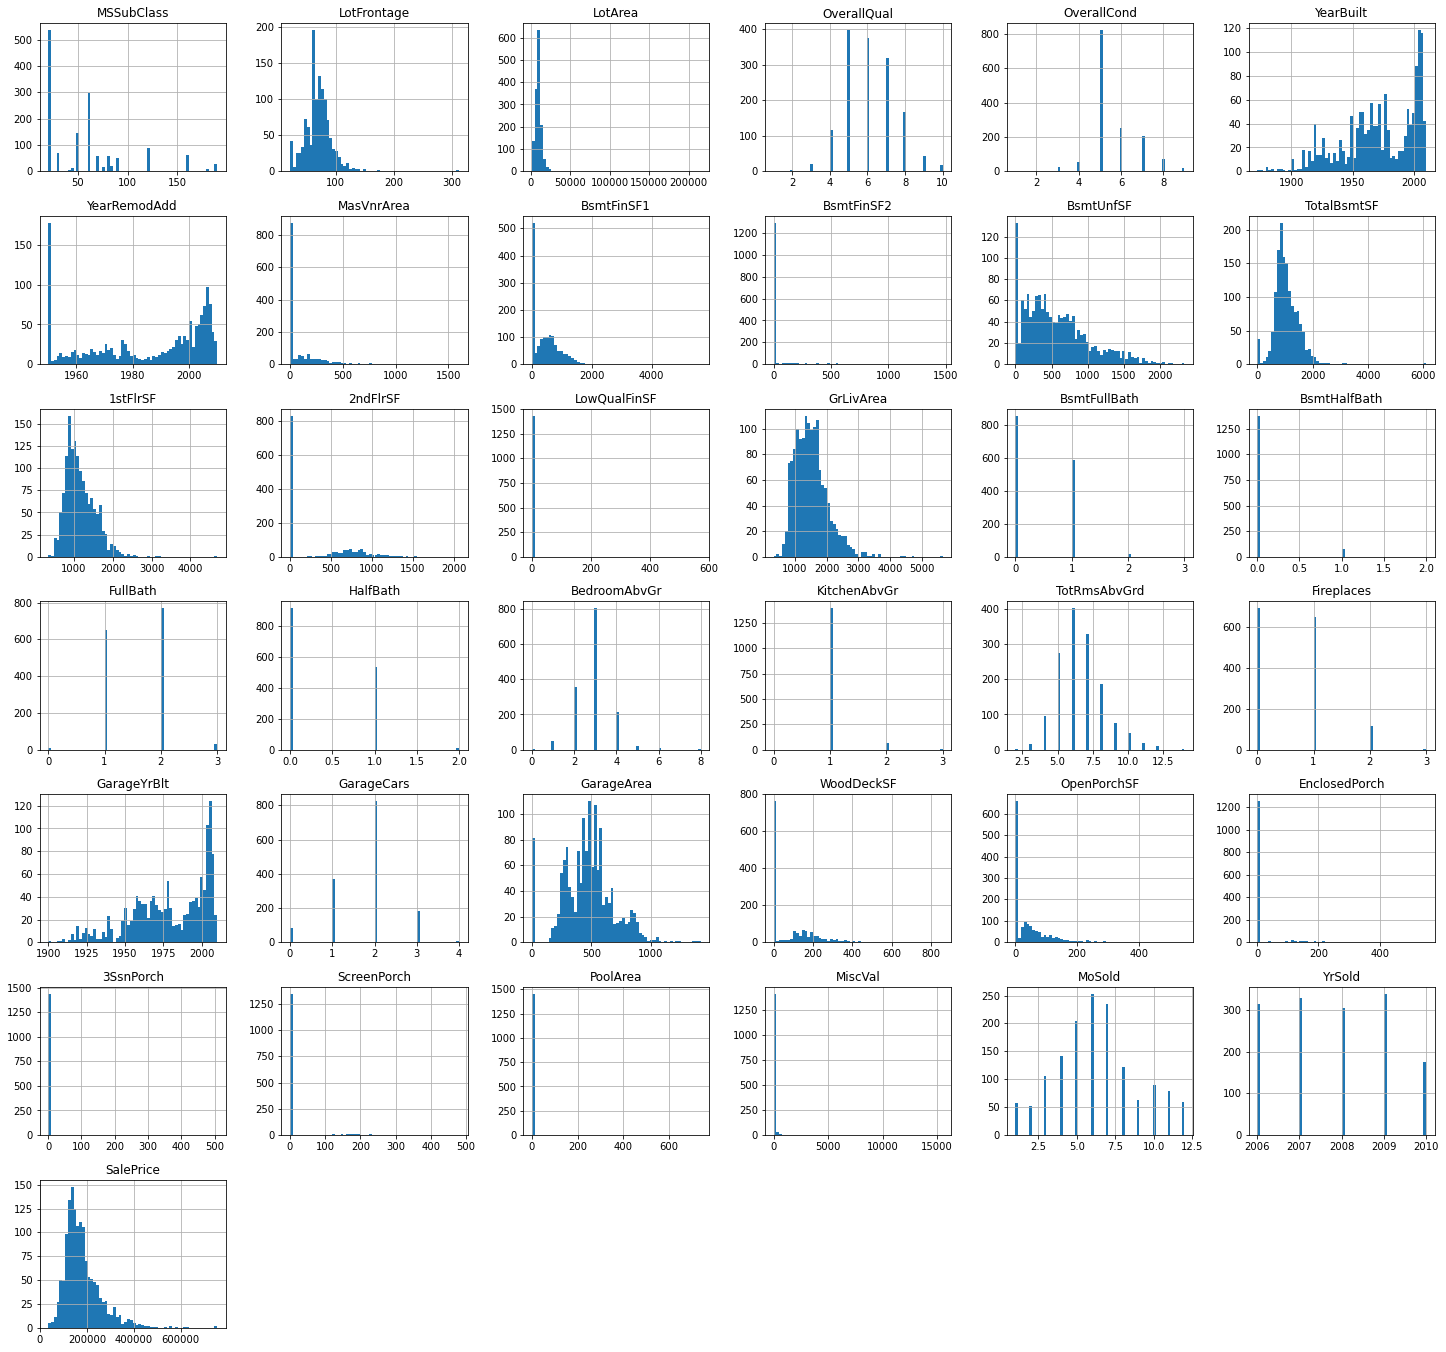

In [14]:
fig= X_train.hist(figsize= (25,24),bins= 60)

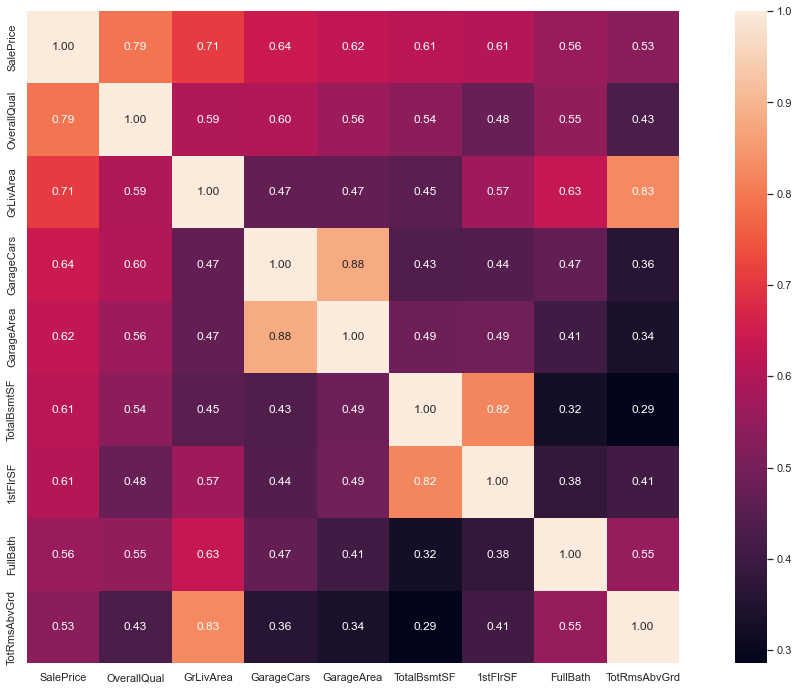

In [15]:
corr_mat= X_train.corr()
k=9
cols= corr_mat.nlargest(k,"SalePrice")["SalePrice"].index
cm= np.corrcoef(X_train[cols].values.T)
sns.set(font_scale= 1)
plt.subplots(figsize= (20,12))
heat_map= sns.heatmap(cm,cbar= True, annot= True, square= True,fmt=".2f", annot_kws={"size":12}, yticklabels=cols.values, xticklabels= cols.values)
plt.show()

Separating numeric data from X_train and X_test

In [16]:
X_train_num= X_train[cols]
X_train_num

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
0,208500,7,1710,2,548,856,856,2,8
1,181500,6,1262,2,460,1262,1262,2,6
2,223500,7,1786,2,608,920,920,2,6
3,140000,7,1717,3,642,756,961,1,7
4,250000,8,2198,3,836,1145,1145,2,9
...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7
1456,210000,6,2073,2,500,1542,2073,2,7
1457,266500,7,2340,1,252,1152,1188,2,9
1458,142125,5,1078,1,240,1078,1078,1,5


In [17]:
X_test_num= X_test[cols[1:]]
X_test_num

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
0,5,896,1.0,730.0,882.0,896,1,5
1,6,1329,1.0,312.0,1329.0,1329,1,6
2,5,1629,2.0,482.0,928.0,928,2,6
3,6,1604,2.0,470.0,926.0,926,2,7
4,8,1280,2.0,506.0,1280.0,1280,2,5
...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5
1455,4,1092,1.0,286.0,546.0,546,1,6
1456,5,1224,2.0,576.0,1224.0,1224,1,7
1457,5,970,0.0,0.0,912.0,970,1,6


In [18]:
cat_train= check_categorical(X_train)
nan_train= check_na(X_train)
print(f"Nan columns: {len(nan_train)} \nCategorical Columns: {len(cat_train)}")

Nan columns: 19 
Categorical Columns: 43


In [19]:
print(cat_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [20]:
cat_test= check_categorical(X_test)
nan_test= check_na(X_test)
print(f"Nan Columns: {len(nan_test)} \nCategorical Columns: {len(cat_test)}")

Nan Columns: 33 
Categorical Columns: 43


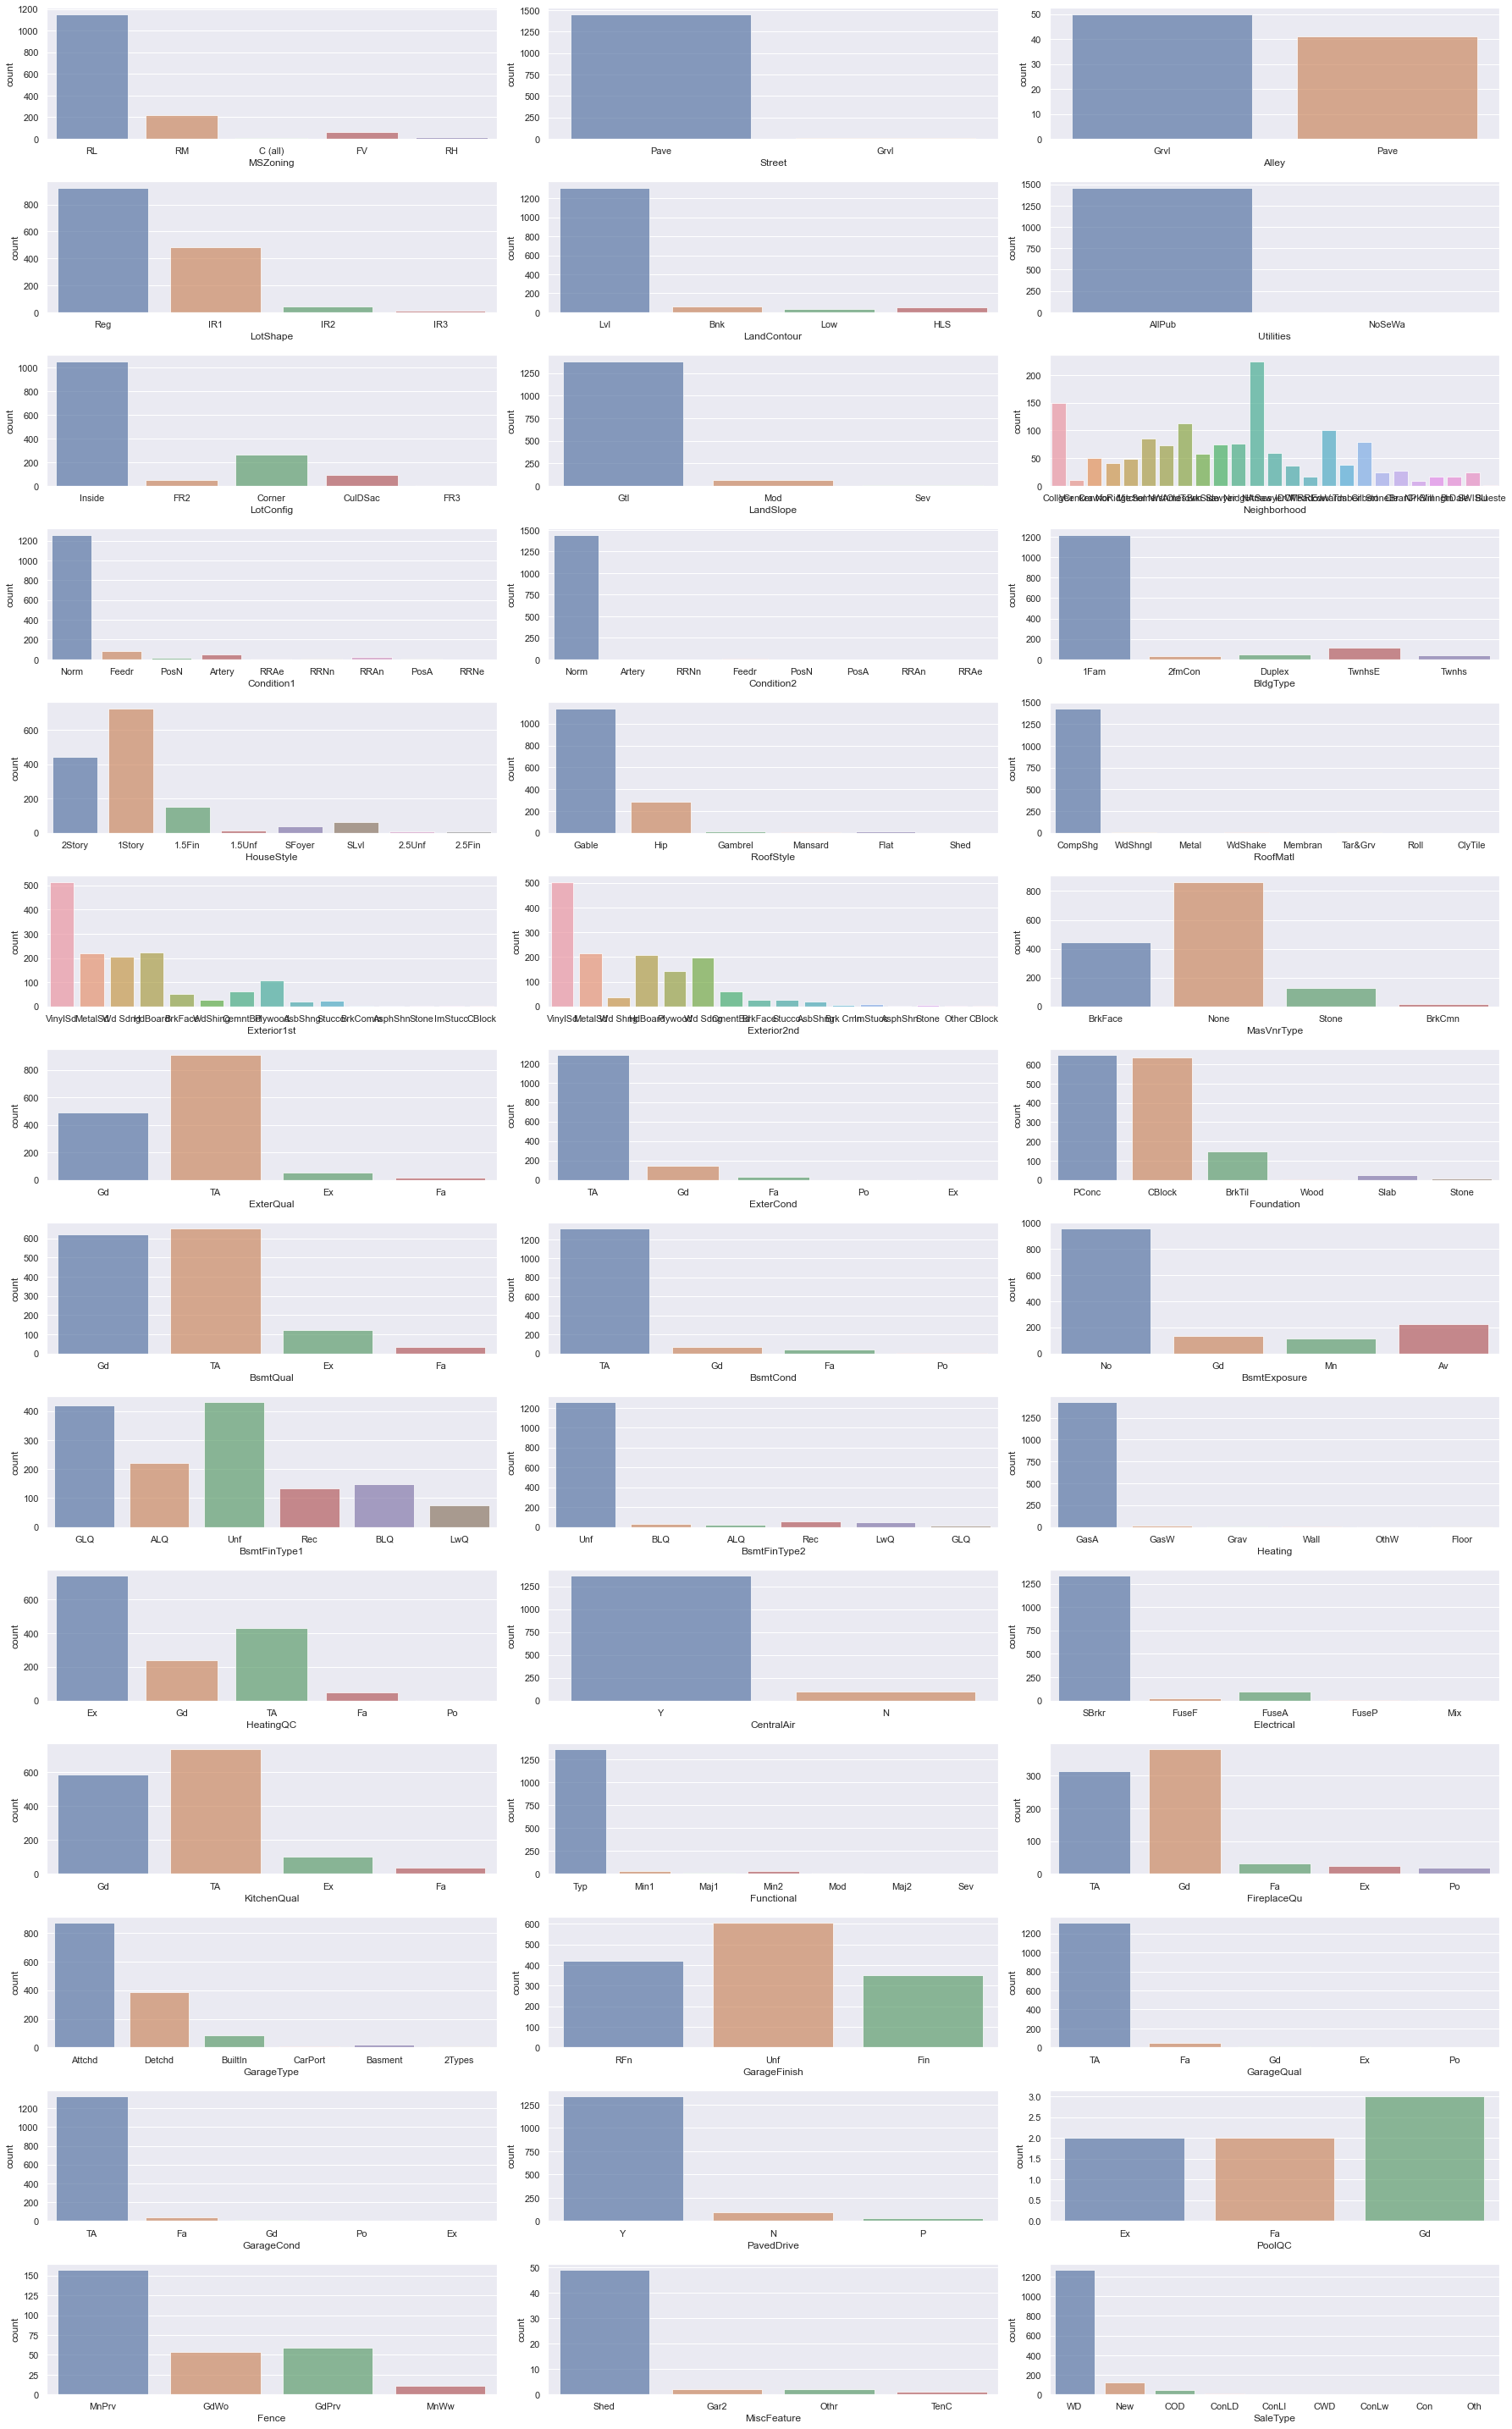

In [21]:
# categorical feature selection

train_categorical= X_train[cat_train]

fig,axes= plt.subplots(14,3, figsize= (25,40))
count=0
for i in range(14):
    for j in range(3):
        sns.countplot(x=train_categorical.columns[count],alpha= 0.7, data= train_categorical, ax=axes[i,j])
        count= count+1
fig.tight_layout()

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

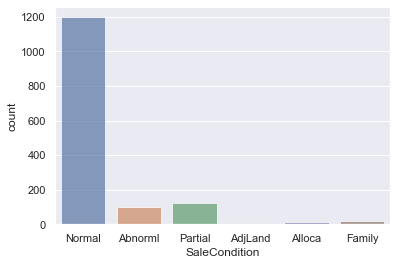

In [22]:
sns.countplot(x= "SaleCondition",alpha= 0.7, data= train_categorical)

In [23]:
# selecting those categorical features that affect the saleprice
# selecting those that does not contain too much labels

cat_features= ["MSZoning", "LotShape", "LandContour", "BldgType", "HouseStyle", "MasVnrType", "ExterQual", "BsmtQual", "BsmtExposure",
              "HeatingQC", "KitchenQual","GarageType","GarageFinish","PoolQC","SaleCondition"]
print(f"Length of categorical features:{len(cat_features)}")

Length of categorical features:15


In [24]:
train_categorical= train_categorical[cat_features]
test_categorical= X_test[cat_features]
print(train_categorical.shape, test_categorical.shape)

(1460, 15) (1459, 15)


In [25]:
# concatenting numeric and categorical data

X_train= pd.concat([X_train_num, train_categorical],axis=1)
X_test= pd.concat([X_test_num, test_categorical],axis=1)

print(X_train.shape, X_test.shape)
X_train.head(10)

(1460, 24) (1459, 23)


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,...,MasVnrType,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,PoolQC,SaleCondition
0,208500,7,1710,2,548,856,856,2,8,RL,...,BrkFace,Gd,Gd,No,Ex,Gd,Attchd,RFn,NaN,Normal
1,181500,6,1262,2,460,1262,1262,2,6,RL,...,None,TA,Gd,Gd,Ex,TA,Attchd,RFn,NaN,Normal
2,223500,7,1786,2,608,920,920,2,6,RL,...,BrkFace,Gd,Gd,Mn,Ex,Gd,Attchd,RFn,NaN,Normal
3,140000,7,1717,3,642,756,961,1,7,RL,...,None,TA,TA,No,Gd,Gd,Detchd,Unf,NaN,Abnorml
4,250000,8,2198,3,836,1145,1145,2,9,RL,...,BrkFace,Gd,Gd,Av,Ex,Gd,Attchd,RFn,NaN,Normal
5,143000,5,1362,2,480,796,796,1,5,RL,...,None,TA,Gd,No,Ex,TA,Attchd,Unf,NaN,Normal
6,307000,8,1694,2,636,1686,1694,2,7,RL,...,Stone,Gd,Ex,Av,Ex,Gd,Attchd,RFn,NaN,Normal
7,200000,7,2090,2,484,1107,1107,2,7,RL,...,Stone,TA,Gd,Mn,Ex,TA,Attchd,RFn,NaN,Normal
8,129900,7,1774,2,468,952,1022,2,8,RM,...,None,TA,TA,No,Gd,TA,Detchd,Unf,NaN,Abnorml
9,118000,5,1077,1,205,991,1077,1,5,RL,...,None,TA,TA,No,Ex,TA,Attchd,RFn,NaN,Normal


Filling nan values:  
* if column contain numeric value, fill mean  
* if it contains object, fill most repeating value

In [26]:
for key in X_train.keys():
    if X_train[key].dtype==np.dtype("O"):
        X_train= X_train.fillna(value= X_train[key].value_counts().index[0])
    else:
        X_train= X_train.fillna(value=X_train[key].mean())
        print("Done")

nan_train= check_na(X_train)
print(nan_train)

Done
Done
Done
Done
Done
Done
Done
Done
Done
[]


In [27]:
for key in X_test:
    if X_test[key].dtype==np.dtype("O"):
        X_test= X_test.fillna(value= X_test[key].value_counts().index[0])
    else:
        X_test= X_test.fillna(value= X_test[key].mean())
        print("Done")
        
nan_test= check_na(X_test)
print(nan_test)

Done
Done
Done
Done
Done
Done
Done
Done
[]


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

for key in cat_features:
    transformed_data= label_encoder.fit_transform(X_train[key].values.astype("str").ravel())
    X_train= X_train.drop(columns= [key])
    X_train= pd.concat([X_train, pd.DataFrame(transformed_data, columns=[key])],axis=1)

In [29]:
print(check_categorical(X_train))
X_train.head()

[]


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,...,MasVnrType,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,PoolQC,SaleCondition
0,208500,7,1710,2,548,856,856,2,8,3,...,2,2,3,4,0,2,2,2,0,4
1,181500,6,1262,2,460,1262,1262,2,6,3,...,3,3,3,2,0,3,2,2,0,4
2,223500,7,1786,2,608,920,920,2,6,3,...,2,2,3,3,0,2,2,2,0,4
3,140000,7,1717,3,642,756,961,1,7,3,...,3,3,4,4,2,2,6,3,0,0
4,250000,8,2198,3,836,1145,1145,2,9,3,...,2,2,3,1,0,2,2,2,0,4


In [30]:
for key in cat_features:
    transformed_data= label_encoder.fit_transform(X_test[key].values.astype("str").ravel())
    X_test= X_test.drop(columns= [key])
    X_test= pd.concat([X_test, pd.DataFrame(transformed_data, columns=[key])],axis=1)    

In [31]:
print(check_categorical(X_test))
X_test.head()

[]


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MSZoning,LotShape,...,MasVnrType,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageType,GarageFinish,PoolQC,SaleCondition
0,5,896,1.0,730.0,882.0,896,1,5,3,3,...,3,3,4,4,4,4,2,3,0,4
1,6,1329,1.0,312.0,1329.0,1329,1,6,4,0,...,2,3,4,4,4,3,2,3,0,4
2,5,1629,2.0,482.0,928.0,928,2,6,4,0,...,3,3,3,4,2,4,2,1,0,4
3,6,1604,2.0,470.0,926.0,926,2,7,4,0,...,2,3,4,4,0,3,2,1,0,4
4,8,1280,2.0,506.0,1280.0,1280,2,5,4,0,...,3,2,3,4,0,3,2,2,0,4


Separating "saleprice" column from train data , dropping it and assigning to train_y

In [32]:
SalePrice= X_train["SalePrice"]
X_train= X_train.drop(columns=["SalePrice"])
Y_train= pd.DataFrame(SalePrice,columns= ["SalePrice"])
Y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


#### Training our model

In [33]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(X_train,Y_train)

from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor(random_state= 42, loss="squared_error",n_estimators=100,learning_rate= 0.1)
GBR.fit(X_train, Y_train.values.ravel())

GradientBoostingRegressor(random_state=42)

In [34]:
print(LR.score(X_train, Y_train))
print(GBR.score(X_train, Y_train))

0.811269209490408
0.9433358808661472


In [35]:
import xgboost as xgb
XGB=xgb.XGBRegressor(booster= "gbtree", eta=0.05, max_depth=7, n_estimators=200, gamma=0.2, reg_lambda=1)
XGB.fit(X_train, Y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.05, gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0500000007,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
print(XGB.score(X_train, Y_train))

0.9917056167709472


In [37]:
pred= XGB.predict(X_test)

In [38]:
result= pd.DataFrame({"Id": Y_test, "SalePrice": pred.ravel()})
result

,Id,SalePrice
0,1461,129385.257812
1,1462,143938.781250
2,1463,151923.625000
3,1464,162844.078125
4,1465,194199.437500
...,...,...
1454,2915,71383.375000
1455,2916,73521.687500
1456,2917,107730.539062
1457,2918,101829.437500


#### Converting result to csv file

In [40]:
result.to_csv("Prediction_House_Regression", index=False)